https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation - looks like same as CDC wonder. Other stuff worth looking at

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle


In [3]:
df = pd.read_csv('suicide_abc.txt', sep = '\t')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 14 columns):
Notes                                              75 non-null object
County                                             3147 non-null object
County Code                                        3147 non-null float64
Deaths                                             3148 non-null object
Population                                         3148 non-null object
Crude Rate                                         3148 non-null object
Crude Rate Lower 95% Confidence Interval           3148 non-null object
Crude Rate Upper 95% Confidence Interval           3148 non-null object
Crude Rate Standard Error                          3148 non-null object
Age Adjusted Rate                                  3148 non-null object
Age Adjusted Rate Lower 95% Confidence Interval    3148 non-null object
Age Adjusted Rate Upper 95% Confidence Interval    3148 non-null object
Age Adjusted Rate Standard Err

In [5]:
df.head()

,Notes,County,County Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,Age Adjusted Rate,Age Adjusted Rate Lower 95% Confidence Interval,Age Adjusted Rate Upper 95% Confidence Interval,Age Adjusted Rate Standard Error,% of Total Deaths
0,NaN,"Autauga County, AL",1001.0,12,55504,Unreliable,11.2,37.8,6.2,Unreliable,10.7,36.1,6.1,0.0%
1,NaN,"Baldwin County, AL",1003.0,39,212628,18.3,13.0,25.1,2.9,17.0,11.8,23.6,2.9,0.1%
2,NaN,"Barbour County, AL",1005.0,Suppressed,25270,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed
3,NaN,"Bibb County, AL",1007.0,Suppressed,22668,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed
4,NaN,"Blount County, AL",1009.0,11,58013,Unreliable,9.5,33.9,5.7,Unreliable,9.2,35.2,6.0,0.0%


In [6]:
df["County_list"]= df["County"].str.split(",")
df['County'] = df['County_list'].str[0]
df['State'] = df['County_list'].str[1]
df["County"]= df["County"].str.replace(" County", "") 
df=df.rename(columns = {'County Code':'County_code'})
df = df.drop(['Notes', 'County_list'], axis = 1)

df['County Code'] = df['County_code'].astype(float)
df.dropna()

df.head()

,County,County_code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,Age Adjusted Rate,Age Adjusted Rate Lower 95% Confidence Interval,Age Adjusted Rate Upper 95% Confidence Interval,Age Adjusted Rate Standard Error,% of Total Deaths,State,County Code
0,Autauga,1001.0,12,55504,Unreliable,11.2,37.8,6.2,Unreliable,10.7,36.1,6.1,0.0%,AL,1001.0
1,Baldwin,1003.0,39,212628,18.3,13.0,25.1,2.9,17.0,11.8,23.6,2.9,0.1%,AL,1003.0
2,Barbour,1005.0,Suppressed,25270,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,AL,1005.0
3,Bibb,1007.0,Suppressed,22668,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,AL,1007.0
4,Blount,1009.0,11,58013,Unreliable,9.5,33.9,5.7,Unreliable,9.2,35.2,6.0,0.0%,AL,1009.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3222 entries, 0 to 3221
Data columns (total 15 columns):
County                                             3147 non-null object
County_code                                        3147 non-null float64
Deaths                                             3148 non-null object
Population                                         3148 non-null object
Crude Rate                                         3148 non-null object
Crude Rate Lower 95% Confidence Interval           3148 non-null object
Crude Rate Upper 95% Confidence Interval           3148 non-null object
Crude Rate Standard Error                          3148 non-null object
Age Adjusted Rate                                  3148 non-null object
Age Adjusted Rate Lower 95% Confidence Interval    3148 non-null object
Age Adjusted Rate Upper 95% Confidence Interval    3148 non-null object
Age Adjusted Rate Standard Error                   3148 non-null object
% of Total Deaths           

In [8]:
df1 = pd.read_csv('2019_county_health_rankings.csv')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 53 columns):
FIPS                                  3142 non-null int64
State                                 3142 non-null object
County                                3142 non-null object
Years of Potential Life Lost Rate     2908 non-null float64
% Fair/Poor Health                    3142 non-null int64
Physically Unhealthy Days             3142 non-null float64
Mentally Unhealthy Days               3142 non-null float64
% LBW                                 3035 non-null float64
% LBW (Black)                         1389 non-null float64
% LBW (Hispanic)                      1404 non-null float64
% LBW (White)                         1816 non-null float64
% Smokers                             3142 non-null int64
% Obese                               3142 non-null int64
Food Environment Index                3123 non-null float64
% Physically Inactive                 3142 non-null int64
% Wit

In [10]:
df1.head()

,FIPS,State,County,Years of Potential Life Lost Rate,% Fair/Poor Health,Physically Unhealthy Days,Mentally Unhealthy Days,% LBW,% LBW (Black),% LBW (Hispanic),...,Income Ratio inequality,% Single-Parent Households,# Associations,Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of violation,% Severe Housing Problems,% Long Commute - Drives Alone
0,1001,Alabama,Autauga,8824.0,18,4.2,4.3,8.0,13.0,NaN,...,4.6,25.0,70,12.6,272.0,74.0,11.7,No,15,38
1,1003,Alabama,Baldwin,7225.0,18,4.1,4.2,8.0,15.0,5.0,...,4.5,25.0,223,10.7,204.0,69.0,10.3,Yes,14,41
2,1005,Alabama,Barbour,9586.0,26,5.1,4.6,11.0,14.0,NaN,...,5.8,57.0,22,8.5,414.0,73.0,11.5,No,15,34
3,1007,Alabama,Bibb,11784.0,20,4.4,4.3,11.0,18.0,NaN,...,4.3,30.0,23,10.2,89.0,100.0,11.2,No,11,49
4,1009,Alabama,Blount,10908.0,21,4.5,4.7,8.0,NaN,7.0,...,4.1,30.0,52,9.0,483.0,105.0,11.7,No,10,60


In [11]:
df1['County_code'] = df1['FIPS'].astype(float)
df1.drop('FIPS', axis = 1, inplace = True)

In [12]:
df1.set_index('County_code')

,State,County,Years of Potential Life Lost Rate,% Fair/Poor Health,Physically Unhealthy Days,Mentally Unhealthy Days,% LBW,% LBW (Black),% LBW (Hispanic),% LBW (White),...,Income Ratio inequality,% Single-Parent Households,# Associations,Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of violation,% Severe Housing Problems,% Long Commute - Drives Alone
County_code,,,,,,,,,,,,,,,,,,,,,
1001.0,Alabama,Autauga,8824.0,18,4.2,4.3,8.0,13.0,NaN,7.0,...,4.6,25.0,70,12.6,272.0,74.0,11.7,No,15,38
1003.0,Alabama,Baldwin,7225.0,18,4.1,4.2,8.0,15.0,5.0,8.0,...,4.5,25.0,223,10.7,204.0,69.0,10.3,Yes,14,41
1005.0,Alabama,Barbour,9586.0,26,5.1,4.6,11.0,14.0,NaN,8.0,...,5.8,57.0,22,8.5,414.0,73.0,11.5,No,15,34
1007.0,Alabama,Bibb,11784.0,20,4.4,4.3,11.0,18.0,NaN,9.0,...,4.3,30.0,23,10.2,89.0,100.0,11.2,No,11,49
1009.0,Alabama,Blount,10908.0,21,4.5,4.7,8.0,NaN,7.0,8.0,...,4.1,30.0,52,9.0,483.0,105.0,11.7,No,10,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037.0,Wyoming,Sweetwater,7497.0,15,3.5,3.5,9.0,NaN,9.0,10.0,...,4.4,23.0,44,10.0,300.0,85.0,5.1,Yes,10,19
56039.0,Wyoming,Teton,3786.0,12,3.2,3.1,7.0,NaN,8.0,7.0,...,3.9,24.0,42,18.1,NaN,62.0,4.9,Yes,16,15
56041.0,Wyoming,Uinta,7790.0,16,3.7,3.7,10.0,NaN,11.0,9.0,...,4.6,22.0,11,5.3,71.0,98.0,5.9,Yes,11,18


In [14]:
a = pd.merge(df, df1, on ='County_code') 
a.sort_values('County_code')
a.head(10)

,County_x,County_code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,Age Adjusted Rate,Age Adjusted Rate Lower 95% Confidence Interval,...,Income Ratio inequality,% Single-Parent Households,# Associations,Association Rate,Violent Crime Rate,Injury Death Rate,Average Daily PM2.5,Presence of violation,% Severe Housing Problems,% Long Commute - Drives Alone
0,Autauga,1001.0,12,55504,Unreliable,11.2,37.8,6.2,Unreliable,10.7,...,4.6,25.0,70,12.6,272.0,74.0,11.7,No,15,38
1,Baldwin,1003.0,39,212628,18.3,13.0,25.1,2.9,17.0,11.8,...,4.5,25.0,223,10.7,204.0,69.0,10.3,Yes,14,41
2,Barbour,1005.0,Suppressed,25270,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,...,5.8,57.0,22,8.5,414.0,73.0,11.5,No,15,34
3,Bibb,1007.0,Suppressed,22668,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,...,4.3,30.0,23,10.2,89.0,100.0,11.2,No,11,49
4,Blount,1009.0,11,58013,Unreliable,9.5,33.9,5.7,Unreliable,9.2,...,4.1,30.0,52,9.0,483.0,105.0,11.7,No,10,60
5,Bullock,1011.0,Suppressed,10309,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,...,6.6,76.0,10,9.7,311.0,110.0,11.2,No,21,47
6,Butler,1013.0,Suppressed,19825,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,...,5.1,53.0,23,11.5,582.0,95.0,10.6,No,14,32
7,Calhoun,1015.0,29,114728,25.3,16.9,36.3,4.7,24.6,16.2,...,5.0,39.0,164,14.3,756.0,82.0,11.8,No,15,31
8,Chambers,1017.0,Suppressed,33713,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,...,4.7,48.0,60,17.7,529.0,81.0,11.4,No,16,31
9,Cherokee,1019.0,Suppressed,25857,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,Suppressed,...,4.8,26.0,26,10.1,330.0,106.0,11.4,No,15,43


In [15]:
a.columns

Index(['County_x', 'County_code', 'Deaths', 'Population', 'Crude Rate',
       'Crude Rate Lower 95% Confidence Interval',
       'Crude Rate Upper 95% Confidence Interval', 'Crude Rate Standard Error',
       'Age Adjusted Rate', 'Age Adjusted Rate Lower 95% Confidence Interval',
       'Age Adjusted Rate Upper 95% Confidence Interval',
       'Age Adjusted Rate Standard Error', '% of Total Deaths', 'State_x',
       'County Code', 'State_y', 'County_y',
       'Years of Potential Life Lost Rate', '% Fair/Poor Health',
       'Physically Unhealthy Days', 'Mentally Unhealthy Days', '% LBW',
       '% LBW (Black)', '% LBW (Hispanic)', '% LBW (White)', '% Smokers',
       '% Obese', 'Food Environment Index', '% Physically Inactive',
       '% With Access', '% Excessive Drinking',
       '# Alcohol-Impaired Driving Deaths', '# Driving Deaths',
       '% driving deaths Alcohol-Impaired ', 'Teen Birth Rate',
       'Teen Birth Rate (Black)', 'Teen Birth Rate (Hispanic)',
       'Teen Birth 

In [16]:
droplist = ['Physically Unhealthy Days', 'Mentally Unhealthy Days','Deaths', 'Population', \
            'Crude Rate Lower 95% Confidence Interval', 'Crude Rate Upper 95% Confidence Interval', 'Crude Rate Standard Error', \
            'Age Adjusted Rate Lower 95% Confidence Interval', 'Age Adjusted Rate Upper 95% Confidence Interval', \
            'Age Adjusted Rate Standard Error', 'County Code', 'State_y', 'County_y', '# Alcohol-Impaired Driving Deaths', \
            'Crude Rate', 'Years of Potential Life Lost Rate', \
            '# Driving Deaths', '# Associations', 'Presence of violation', 'Injury Death Rate', '% of Total Deaths', '% Vaccinated', \
            '% Children in Poverty (Black)', '% Children in Poverty (Hispanic)', '% Children in Poverty (White)', '% Vaccinated (White)',\
            '% LBW (Black)', '% LBW (Hispanic)', '% LBW (White)', \
            'Preventable Hosp. Rate (Black)', 'Preventable Hosp. Rate (Hispanic)', 'Preventable Hosp. Rate (White)', \
            '% Vaccinated (Black)', '% Vaccinated (Hispanic)', '% Vaccinated (White)', 'Teen Birth Rate (Black)', 'Teen Birth Rate (Hispanic)', \
            'Teen Birth Rate (White)']

a = a.drop(droplist, axis = 1)

In [17]:
# filter 
a = a[a['Age Adjusted Rate'] != 'Unreliable']
a = a[a['Age Adjusted Rate'] != 'Suppressed']

# change some ratios and percents to integers/floats
a = a.replace({':1':''}, regex = True)
a = a.replace({'\%':''}, regex = True)

# change type 
a['Age Adjusted Rate'] = a['Age Adjusted Rate'].astype(float)
a['Dentist Ratio'] = a['Dentist Ratio'].astype(float)
a['MHP Ratio'] = a['MHP Ratio'].astype(float)
a['PCP Ratio'] = a['PCP Ratio'].astype(float)

# make the target column name simpler and remove spaces
a.rename(columns={'Age Adjusted Rate': 'rate'}, inplace = True)

# dropna - I considered replacing with mean but decided against it
a = a.dropna()

In [18]:
a.head()

,County_x,County_code,rate,State_x,% Fair/Poor Health,% LBW,% Smokers,% Obese,Food Environment Index,% Physically Inactive,...,% Some College,% Unemployed,% Children in Poverty,Income Ratio inequality,% Single-Parent Households,Association Rate,Violent Crime Rate,Average Daily PM2.5,% Severe Housing Problems,% Long Commute - Drives Alone
1,Baldwin,1003.0,17.0,AL,18,8.0,17,31,8.0,24,...,66,4.0,15.0,4.5,25.0,10.7,204.0,10.3,14,41
7,Calhoun,1015.0,24.6,AL,20,9.0,20,37,6.9,30,...,58,4.9,24.0,5.0,39.0,14.3,756.0,11.8,15,31
21,Cullman,1043.0,24.7,AL,21,8.0,20,35,8.3,33,...,51,3.7,19.0,4.6,28.0,12.6,129.0,11.6,14,35
24,DeKalb,1049.0,28.5,AL,23,8.0,22,30,8.4,31,...,44,4.5,28.0,4.7,33.0,9.0,312.0,11.3,13,30
36,Jefferson,1073.0,16.2,AL,20,11.0,18,33,6.2,28,...,67,4.2,23.0,5.4,44.0,14.5,873.0,13.4,18,33


In [19]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527 entries, 1 to 3129
Data columns (total 30 columns):
County_x                              527 non-null object
County_code                           527 non-null float64
rate                                  527 non-null float64
State_x                               527 non-null object
% Fair/Poor Health                    527 non-null int64
% LBW                                 527 non-null float64
% Smokers                             527 non-null int64
% Obese                               527 non-null int64
Food Environment Index                527 non-null float64
% Physically Inactive                 527 non-null int64
% With Access                         527 non-null float64
% Excessive Drinking                  527 non-null int64
% driving deaths Alcohol-Impaired     527 non-null float64
Teen Birth Rate                       527 non-null float64
% Uninsured                           527 non-null float64
PCP Ratio            

In [20]:
# OLS with patsy

col_list = a.columns.drop(['rate', 'State_x', 'County_code', 'County_x'])
col_list_for_patsy = ["Q('{}')".format(c) for c in col_list]
features = " + ".join(col_list_for_patsy)
str1 = 'rate ~ ' + features

ypat, Xpat = dmatrices(str1, a, return_type='dataframe')

model = sm.OLS(ypat, Xpat, data = a)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     32.64
Date:                Tue, 08 Oct 2019   Prob (F-statistic):           1.22e-90
Time:                        19:21:48   Log-Likelihood:                -1477.8
No. Observations:                 527   AIC:                             3010.
Df Residuals:                     500   BIC:                             3125.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  91.7981      7.638     12.019      0.000      76.792     106.804
Q('% Fair/Poor Health')                    -0.1749      0.129     -1.358      0.175      -0.428       0.078
Q('% LBW')                                 -0.4020      0.214     -1.877      0.061      -0.823       0.019
Q('% Smokers')                              0.5543      0.111      5.002      0.000       0.337       0.772
Q('% Obese')                               -0.2209      0.071     -3.096      0.002      -0.361      -0.081
Q('Food Environment Index')                -2.3424      0.388     -6.038      0.000      -3.105      -1.580
Q('% Physically Inactive')                 -0.0575      0.077     -0.746      0.456      -0.209       0.094
Q('% With Access')                         -0.1015      0.023     -4.431      0.000      -0.146      -0.056
Q('% Excessive Drinking')                  -0.1952      0.085     -2.285      0.023      -0.363      -0.027
Q('% driving deaths Alcohol-Impaired ')     0.0299      0.028      1.072      0.284      -0.025       0.085
Q('Teen Birth Rate')                        0.1657      0.040      4.176      0.000       0.088       0.244
Q('% Uninsured')                           -0.2872      0.078     -3.691      0.000      -0.440      -0.134
Q('PCP Ratio')                              0.0013      0.000      2.904      0.004       0.000       0.002
Q('Dentist Ratio')                         -0.0016      0.000     -3.445      0.001      -0.002      -0.001
Q('MHP Ratio')                              0.0010      0.001      1.573      0.116      -0.000       0.002
Q('Preventable Hosp. Rate')                -0.0007      0.000     -2.992      0.003      -0.001      -0.000
Q('Graduation Rate')                       -0.0625      0.039     -1.585      0.113      -0.140       0.015
Q('% Some College')                        -0.1728      0.045     -3.857      0.000      -0.261      -0.085
Q('% Unemployed')                          -0.6649      0.210     -3.169      0.002      -1.077      -0.253
Q('% Children in Poverty')                  0.0814      0.076      1.069      0.285      -0.068       0.231
Q('Income Ratio inequality')                0.1111      0.459      0.242      0.809      -0.791       1.013
Q('% Single-Parent Households')            -0.2323      0.057     -4.084      0.000      -0.344      -0.121
Q('Association Rate')                       0.0916      0.086      1.062      0.289      -0.078       0.261
Q('Violent Crime Rate')                    -0.0015      0.001     -1.216      0.225      -0.004       0.001
Q('Average Daily PM2.5')                   -0.8515      0.115     -7.395      0.000      -1.078      -0.625
Q('% Severe Housing Problems')             -0.2385      0.0

In [22]:
# OLS without patsy

objectdroplist = ['State_x', 'County_code', 'County_x']

Xnopat = a.drop(columns=["rate"] + objectdroplist).astype(float)
ynopat = a.loc[:,"rate"].astype(float)

model = sm.OLS(ynopat, sm.add_constant(Xnopat), data=a)
results = model.fit() 
results.summary()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     32.64
Date:                Tue, 08 Oct 2019   Prob (F-statistic):           1.22e-90
Time:                        19:21:57   Log-Likelihood:                -1477.8
No. Observations:                 527   AIC:                             3010.
Df Residuals:                     500   BIC:                             3125.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 91.7981      7.638     12.019      0.000      76.792     106.804
% Fair/Poor Health                    -0.1749      0.129     -1.358      0.175      -0.428       0.078
% LBW                                 -0.4020      0.214     -1.877      0.061      -0.823       0.019
% Smokers                              0.5543      0.111      5.002      0.000       0.337       0.772
% Obese                               -0.2209      0.071     -3.096      0.002      -0.361      -0.081
Food Environment Index                -2.3424      0.388     -6.038      0.000      -3.105      -1.580
% Physically Inactive                 -0.0575      0.077     -0.746      0.456      -0.209       0.094
% With Access                         -0.1015      0.023     -4.431      0.000      -0.146      -0.056
% Excessive Drinking                  -0.1952      0.085     -2.285      0.023      -0.363      -0.027
% driving deaths Alcohol-Impaired      0.0299      0.028      1.072      0.284      -0.025       0.085
Teen Birth Rate                        0.1657      0.040      4.176      0.000       0.088       0.244
% Uninsured                           -0.2872      0.078     -3.691      0.000      -0.440      -0.134
PCP Ratio                              0.0013      0.000      2.904      0.004       0.000       0.002
Dentist Ratio                         -0.0016      0.000     -3.445      0.001      -0.002      -0.001
MHP Ratio                              0.0010      0.001      1.573      0.116      -0.000       0.002
Preventable Hosp. Rate                -0.0007      0.000     -2.992      0.003      -0.001      -0.000
Graduation Rate                       -0.0625      0.039     -1.585      0.113      -0.140       0.015
% Some College                        -0.1728      0.045     -3.857      0.000      -0.261      -0.085
% Unemployed                          -0.6649      0.210     -3.169      0.002      -1.077      -0.253
% Children in Poverty                  0.0814      0.076      1.069      0.285      -0.068       0.231
Income Ratio inequality                0.1111      0.459      0.242      0.809      -0.791       1.013
% Single-Parent Households            -0.2323      0.057     -4.084      0.000      -0.344      -0.121
Association Rate                       0.0916      0.086      1.062      0.289      -0.078       0.261
Violent Crime Rate                    -0.0015      0.001     -1.216      0.225      -0.004       0.001
Average Daily PM2.5                   -0.8515      0.115     -7.395      0.000      -1.078      -0.625
% Severe Housing Problems             -0.2385      0.083     -2.886      0.004      -0.401      -0.076
% Long Commute - Drives Alone         -0.0530      0.024     -2.228      0.026      -0.100      

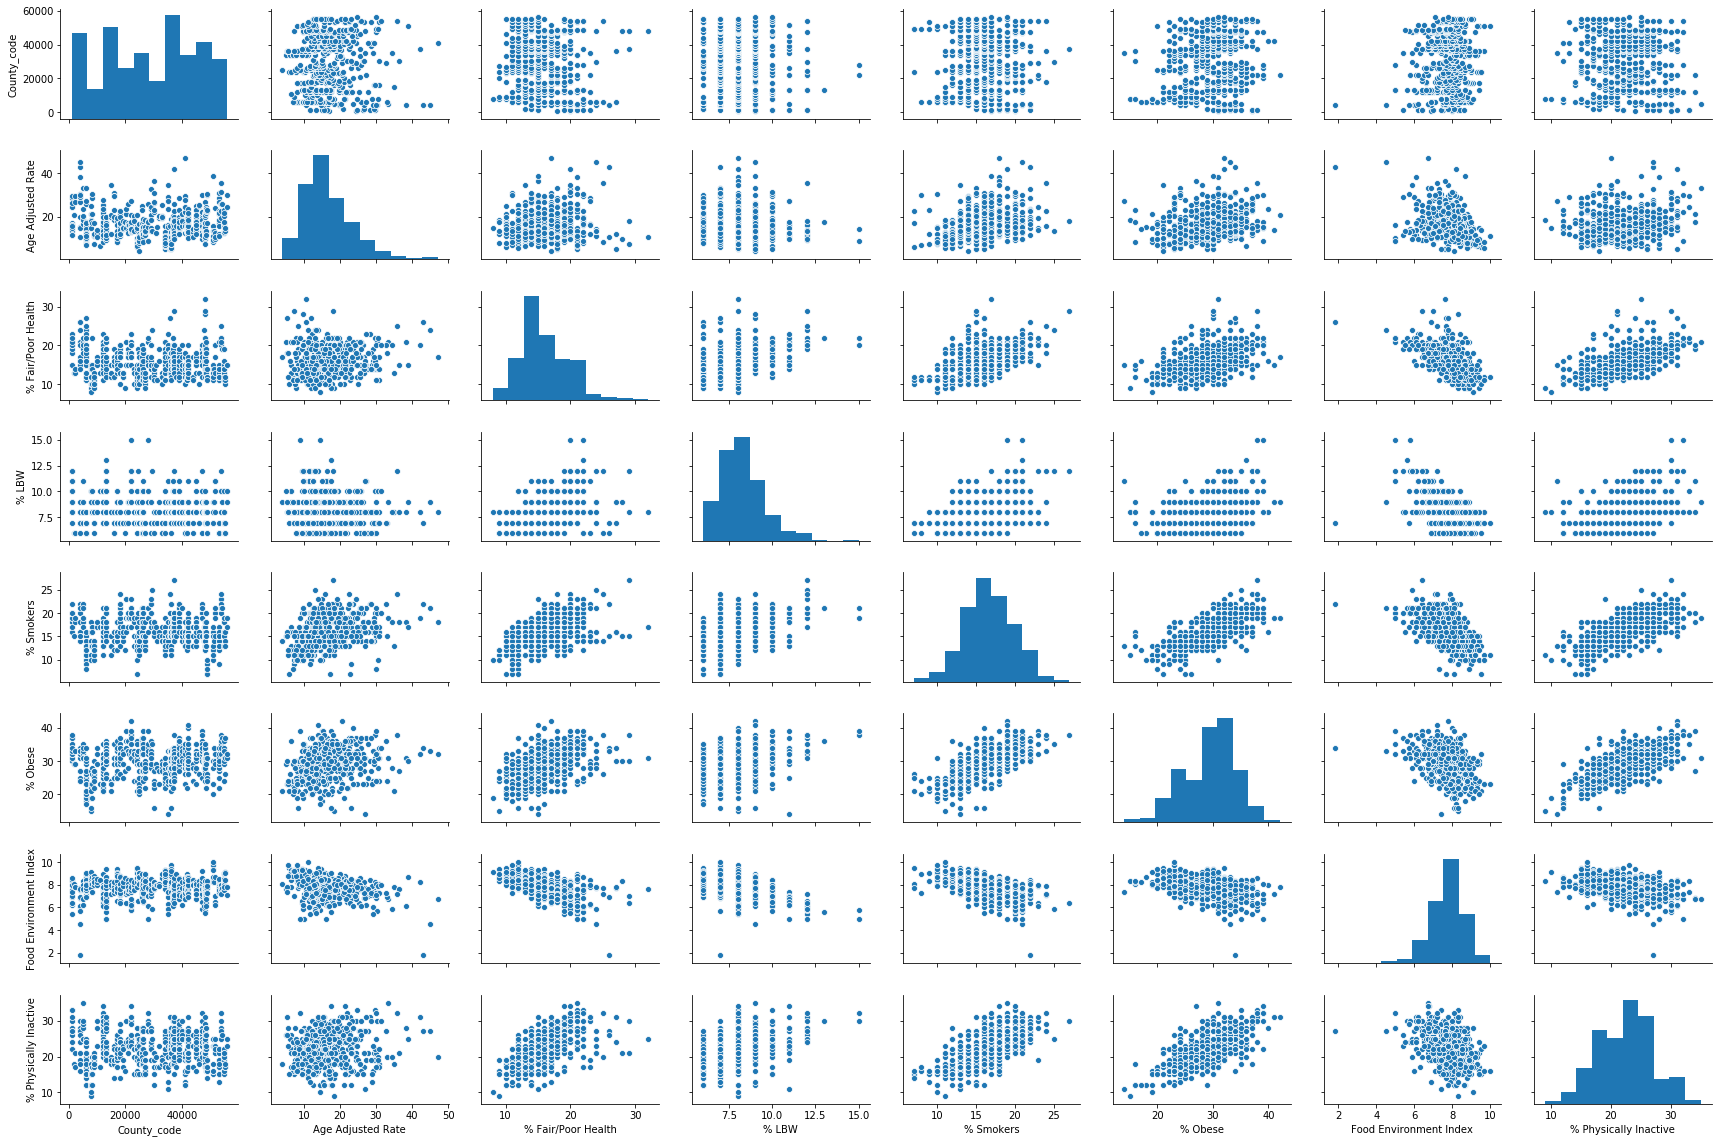

In [39]:
sns.pairplot(a.iloc[:, :10], height=2, aspect=1.5);


//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


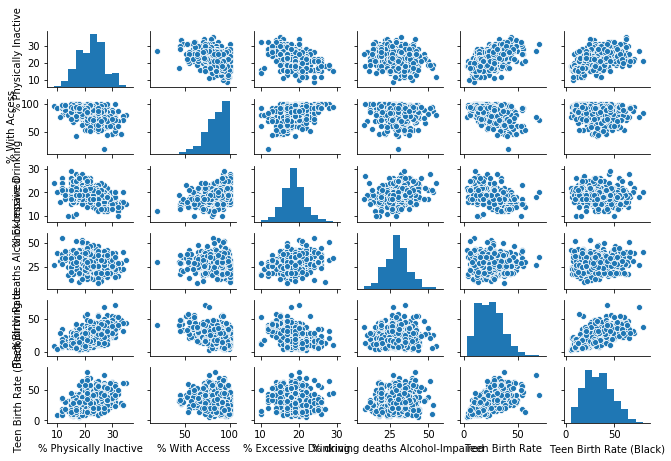

In [32]:
sns.pairplot(a.iloc[:, 9:15], height=1.2, aspect=1.5);


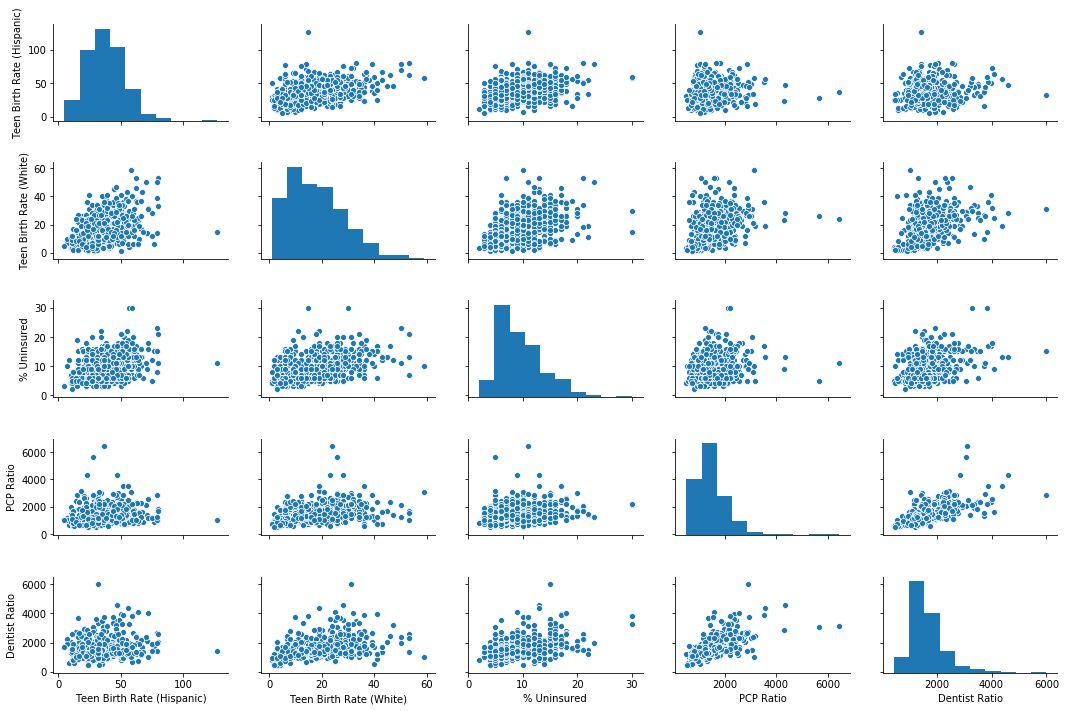

In [35]:
sns.pairplot(a.iloc[:, 15:20], height=2, aspect=1.5);


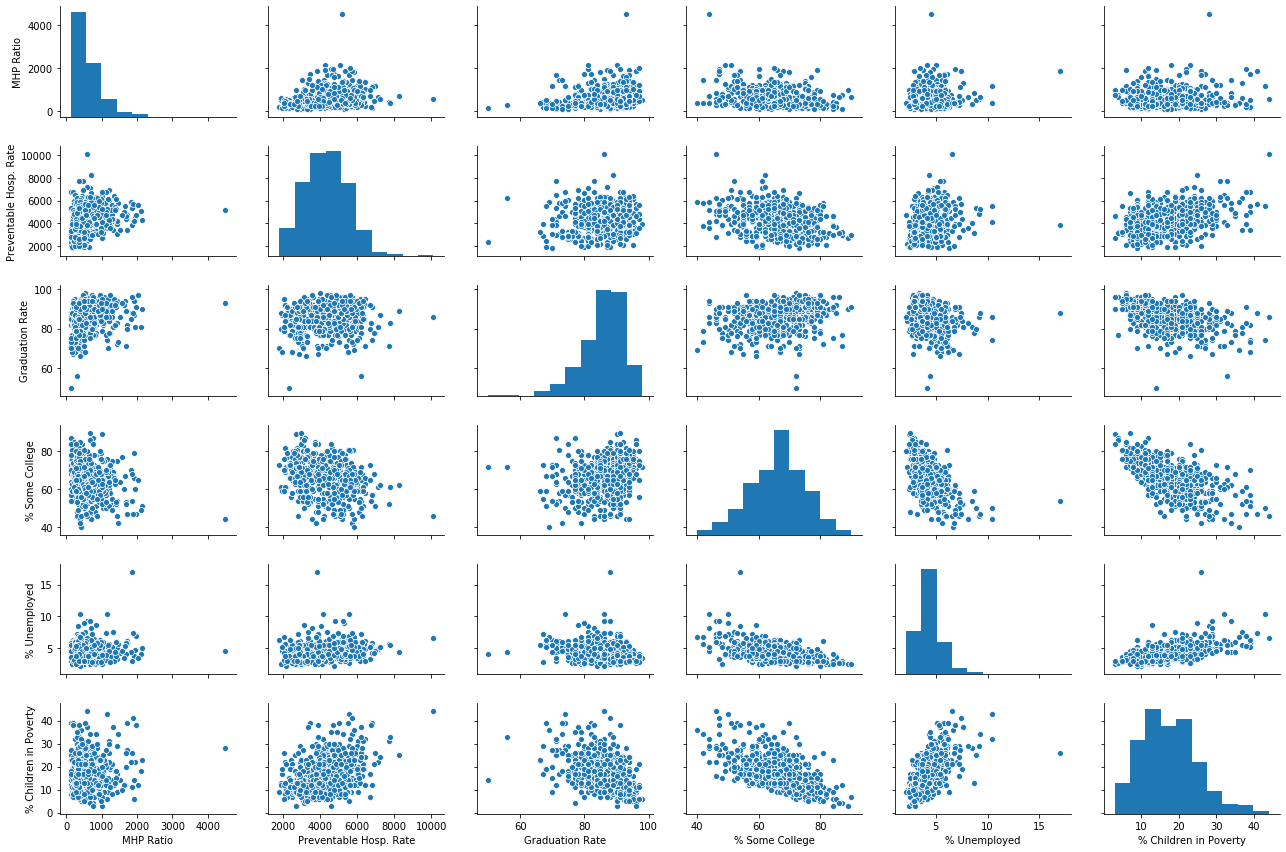

In [36]:
sns.pairplot(a.iloc[:, 20:26], height=2, aspect=1.5);


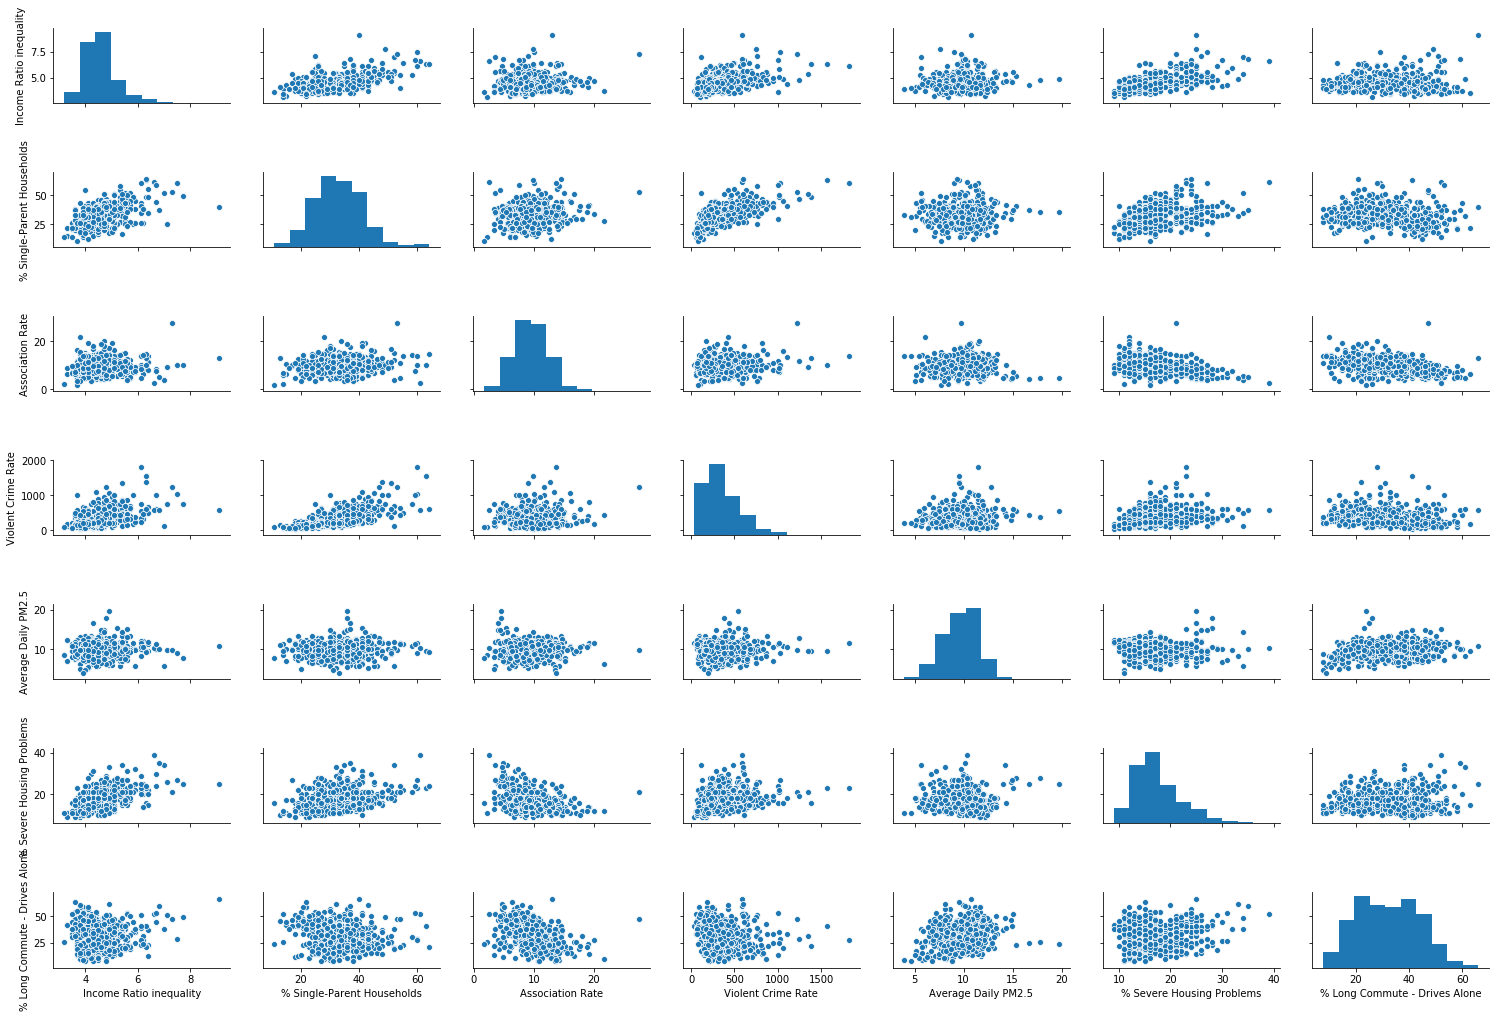

In [37]:
sns.pairplot(a.iloc[:, 26:34], height=2, aspect=1.5);


In [23]:
a['% With Access eng 1'] = (a['% With Access'])**4
a = a.drop(['% With Access'], axis = 1)

In [24]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527 entries, 1 to 3129
Data columns (total 30 columns):
County_x                              527 non-null object
County_code                           527 non-null float64
rate                                  527 non-null float64
State_x                               527 non-null object
% Fair/Poor Health                    527 non-null int64
% LBW                                 527 non-null float64
% Smokers                             527 non-null int64
% Obese                               527 non-null int64
Food Environment Index                527 non-null float64
% Physically Inactive                 527 non-null int64
% Excessive Drinking                  527 non-null int64
% driving deaths Alcohol-Impaired     527 non-null float64
Teen Birth Rate                       527 non-null float64
% Uninsured                           527 non-null float64
PCP Ratio                             527 non-null float64
Dentist Ratio        

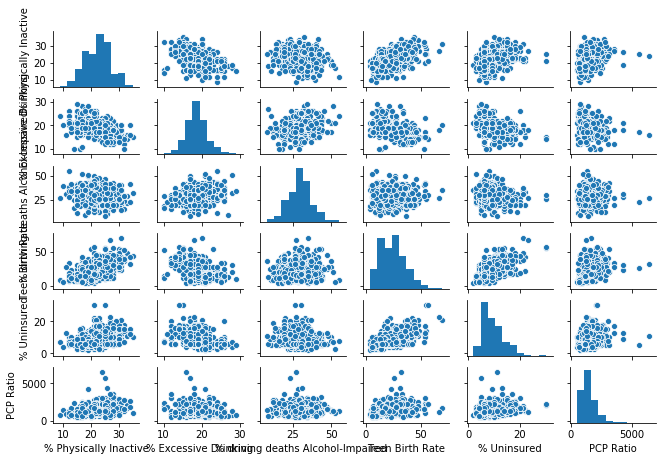

In [176]:
sns.pairplot(a.iloc[:, 9:15], height=1.2, aspect=1.5);

In [185]:
col_list = a.columns.drop(['rate', 'State_x', 'County_code', 'County_x'])
col_list_for_patsy = ["Q('{}')".format(c) for c in col_list]
features = " + ".join(col_list_for_patsy)
str1 = 'rate ~ ' + features

ypat, Xpat = dmatrices(str1, a, return_type='dataframe')

model = sm.OLS(ypat, Xpat, data = a)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     32.13
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.37e-89
Time:                        18:18:56   Log-Likelihood:                -1480.4
No. Observations:                 527   AIC:                             3015.
Df Residuals:                     500   BIC:                             3130.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  84.5416      7.721     10.950      0.000      69.372      99.711
Q('% Fair/Poor Health')                    -0.1711      0.130     -1.319      0.188      -0.426       0.084
Q('% LBW')                                 -0.4291      0.215     -1.995      0.047      -0.852      -0.006
Q('% Smokers')                              0.5637      0.111      5.065      0.000       0.345       0.782
Q('% Obese')                               -0.2205      0.072     -3.073      0.002      -0.361      -0.080
Q('Food Environment Index')                -2.3634      0.394     -6.002      0.000      -3.137      -1.590
Q('% Physically Inactive')                 -0.0695      0.077     -0.899      0.369      -0.221       0.082
Q('% Excessive Drinking')                  -0.2084      0.086     -2.432      0.015      -0.377      -0.040
Q('% driving deaths Alcohol-Impaired ')     0.0299      0.028      1.067      0.286      -0.025       0.085
Q('Teen Birth Rate')                        0.1792      0.040      4.498      0.000       0.101       0.258
Q('% Uninsured')                           -0.2973      0.078     -3.806      0.000      -0.451      -0.144
Q('PCP Ratio')                              0.0014      0.000      3.079      0.002       0.000       0.002
Q('Dentist Ratio')                         -0.0016      0.000     -3.501      0.001      -0.002      -0.001
Q('MHP Ratio')                              0.0012      0.001      1.781      0.076      -0.000       0.002
Q('Preventable Hosp. Rate')                -0.0007      0.000     -2.796      0.005      -0.001      -0.000
Q('Graduation Rate')                       -0.0587      0.040     -1.481      0.139      -0.137       0.019
Q('% Some College')                        -0.1705      0.045     -3.753      0.000      -0.260      -0.081
Q('% Unemployed')                          -0.6715      0.211     -3.185      0.002      -1.086      -0.257
Q('% Children in Poverty')                  0.0806      0.076      1.053      0.293      -0.070       0.231
Q('Income Ratio inequality')                0.2937      0.460      0.639      0.523      -0.610       1.197
Q('% Single-Parent Households')            -0.2379      0.057     -4.143      0.000      -0.351      -0.125
Q('Association Rate')                       0.1002      0.087      1.155      0.249      -0.070       0.271
Q('Violent Crime Rate')                    -0.0018      0.001     -1.445      0.149      -0.004       0.001
Q('Average Daily PM2.5')                   -0.8719      0.115     -7.550      0.000      -1.099      -0.645
Q('% Severe Housing Problems')             -0.2261      0.084     -2.704      0.007      -0.390      -0.062
Q('% Long Commute - Drives Alone')         -0.0462      0.0

In [186]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Xpat.values, i) for i in range(Xpat.shape[1])]
vif["features"] = Xpat.columns

In [187]:
vif.round(1)

,VIF Factor,features
0,1848.4,Intercept
1,6.7,Q('% Fair/Poor Health')
2,3.0,Q('% LBW')
3,3.9,Q('% Smokers')
4,3.5,Q('% Obese')
5,3.7,Q('Food Environment Index')
6,4.0,Q('% Physically Inactive')
7,2.0,Q('% Excessive Drinking')
8,1.3,Q('% driving deaths Alcohol-Impaired ')
9,6.2,Q('Teen Birth Rate')


In [ ]:
Q('% Fair/Poor Health') + Q('% Single-Parent Households') + Q('% Some College') + Q('Teen Birth Rate') + Q('% Fair/Poor Health') Q('% Children in Poverty')

In [188]:
str1

"rate ~ Q('% Fair/Poor Health') + Q('% LBW') + Q('% Smokers') + Q('% Obese') + Q('Food Environment Index') + Q('% Physically Inactive') + Q('% Excessive Drinking') + Q('% driving deaths Alcohol-Impaired ') + Q('Teen Birth Rate') + Q('% Uninsured') + Q('PCP Ratio') + Q('Dentist Ratio') + Q('MHP Ratio') + Q('Preventable Hosp. Rate') + Q('Graduation Rate') + Q('% Some College') + Q('% Unemployed') + Q('% Children in Poverty') + Q('Income Ratio inequality') + Q('% Single-Parent Households') + Q('Association Rate') + Q('Violent Crime Rate') + Q('Average Daily PM2.5') + Q('% Severe Housing Problems') + Q('% Long Commute - Drives Alone') + Q('% With Access eng 1')"

In [189]:
str2 = "rate ~ Q('% LBW') + Q('% Smokers') + Q('% Obese') + Q('Food Environment Index') + Q('% Physically Inactive') + Q('% Excessive Drinking') + Q('% driving deaths Alcohol-Impaired ') + Q('% Uninsured') + Q('PCP Ratio') + Q('Dentist Ratio') + Q('MHP Ratio') + Q('Preventable Hosp. Rate') + Q('Graduation Rate') +Q('% Unemployed') + Q('Income Ratio inequality') + Q('Association Rate') + Q('Violent Crime Rate') + Q('Average Daily PM2.5') + Q('% Severe Housing Problems') + Q('% Long Commute - Drives Alone') + Q('% With Access eng 1')"

In [190]:
yvif2, Xvif2 = dmatrices(str2, a, return_type='dataframe')
model = sm.OLS(yvif2, Xvif2)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     32.18
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           2.62e-79
Time:                        18:21:54   Log-Likelihood:                -1515.4
No. Observations:                 527   AIC:                             3075.
Df Residuals:                     505   BIC:                             3169.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  66.4530      6.017     11.044      0.000      54.632      78.274
Q('% LBW')                                 -0.8837      0.209     -4.226      0.000      -1.294      -0.473
Q('% Smokers')                              0.5580      0.108      5.162      0.000       0.346       0.770
Q('% Obese')                               -0.1904      0.074     -2.560      0.011      -0.336      -0.044
Q('Food Environment Index')                -1.4968      0.368     -4.064      0.000      -2.220      -0.773
Q('% Physically Inactive')                  0.0255      0.078      0.326      0.745      -0.128       0.179
Q('% Excessive Drinking')                  -0.3841      0.087     -4.428      0.000      -0.554      -0.214
Q('% driving deaths Alcohol-Impaired ')     0.0681      0.029      2.343      0.020       0.011       0.125
Q('% Uninsured')                           -0.0025      0.069     -0.036      0.971      -0.139       0.134
Q('PCP Ratio')                              0.0019      0.000      4.157      0.000       0.001       0.003
Q('Dentist Ratio')                         -0.0018      0.000     -3.853      0.000      -0.003      -0.001
Q('MHP Ratio')                              0.0011      0.001      1.555      0.121      -0.000       0.002
Q('Preventable Hosp. Rate')                -0.0008      0.000     -2.991      0.003      -0.001      -0.000
Q('Graduation Rate')                       -0.0945      0.040     -2.383      0.018      -0.172      -0.017
Q('% Unemployed')                          -0.2523      0.197     -1.282      0.201      -0.639       0.134
Q('Income Ratio inequality')                0.1392      0.454      0.307      0.759      -0.753       1.031
Q('Association Rate')                       0.1102      0.088      1.258      0.209      -0.062       0.282
Q('Violent Crime Rate')                    -0.0010      0.001     -0.847      0.398      -0.003       0.001
Q('Average Daily PM2.5')                   -0.7996      0.119     -6.740      0.000      -1.033      -0.567
Q('% Severe Housing Problems')             -0.2975      0.075     -3.970      0.000      -0.445      -0.150
Q('% Long Commute - Drives Alone')         -0.0805      0.023     -3.437      0.001      -0.126      -0.034
Q('% With Access eng 1')                -6.961e-08   1.15e-08     -6.029      0.000   -9.23e-08   -4.69e-08
==============================================================================
Omnibus:                       97.342   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.503
Skew:                           0.864   Prob(JB):                     9.20e-66
Kurtosis:                       6.264   Cond. No.                  

In [195]:
vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(Xvif2.values, i) for i in range(Xvif2.shape[1])]
vif2["features"] = Xvif2.columns
vif2.round(1)

,VIF Factor,features
0,992.7,Intercept
1,2.5,Q('% LBW')
2,3.2,Q('% Smokers')
3,3.3,Q('% Obese')
4,2.9,Q('Food Environment Index')
5,3.7,Q('% Physically Inactive')
6,1.8,Q('% Excessive Drinking')
7,1.3,Q('% driving deaths Alcohol-Impaired ')
8,2.3,Q('% Uninsured')
9,2.4,Q('PCP Ratio')


In [198]:
with open('suicide1.pickle', 'wb') as to_write:
    pickle.dump(a, to_write)